In [34]:
# to handle datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for text / string processing
import re

# for plotting
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split
# Modelling Helpers:
# from sklearn.preprocessing import Imputer, Normalizer, scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, ShuffleSplit, cross_validate
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# for tree binarisation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
# Evaluation metrics for Classification
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,ElasticNet,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
# Evaluation metrics for Regression 
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, roc_auc_score, auc,
                             precision_score, recall_score, roc_curve, precision_recall_curve,
                             precision_recall_fscore_support, f1_score,
                             precision_recall_fscore_support)

# to evaluate the models
from sklearn.metrics import roc_auc_score
from sklearn import metrics

pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [35]:
# load dataset
train_df = pd.read_csv('preprocessed_Train.csv')
test_df = pd.read_csv('preprocessed_Test.csv')
(train_df.shape, test_df.shape)

((668, 17), (223, 17))

In [36]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_numerical,Cabin_categorical,Ticket_numerical,Ticket_categorical,Title,Family_size,is_mother,Age_NA,Ticket_numerical_NA
0,0,1,1,31.0,1,0,0.500000,0.345603,71.000000,0.720930,0.421687,0.342857,0.153646,2,0,0,0
1,1,2,0,18.0,0,2,0.416667,0.345603,157.888732,0.304348,0.279070,0.382114,0.706767,3,0,0,0
2,0,3,0,9.0,3,2,0.450000,0.345603,157.888732,0.304348,0.123457,0.382114,0.706767,6,0,0,0
3,1,2,0,22.0,1,1,0.450000,0.345603,157.888732,0.304348,0.279070,0.382114,0.795918,3,1,0,0
4,0,3,1,19.0,0,0,0.212500,0.345603,157.888732,0.304348,0.279070,0.382114,0.153646,1,0,0,0


In [37]:
training_vars = [var for var in train_df.columns if var not in ['PassengerId', 'Survived']]
training_vars

['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'Cabin_numerical',
 'Cabin_categorical',
 'Ticket_numerical',
 'Ticket_categorical',
 'Title',
 'Family_size',
 'is_mother',
 'Age_NA',
 'Ticket_numerical_NA']

In [38]:
X_train = train_df[training_vars]
y_train = train_df['Survived']
X_test = test_df[training_vars]
y_test = test_df['Survived']

In [39]:
# fit scaler
scaler = MinMaxScaler() # create an instance
scaler.fit(X_train[training_vars]) #  fit  the scaler to the train set and then transform it

MinMaxScaler(copy=True, feature_range=(0, 1))

In [40]:
X_train = pd.DataFrame(scaler.transform(X_train[training_vars]),columns=training_vars)
X_test = pd.DataFrame(scaler.transform(X_test[training_vars]),columns=training_vars)

In [41]:
X_train.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_numerical,Cabin_categorical,Ticket_numerical,Ticket_categorical,Title,Family_size,is_mother,Age_NA,Ticket_numerical_NA
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.649701,0.648204,0.407217,0.118263,0.165419,0.420659,0.201604,0.850257,0.177012,0.537077,0.567536,0.357461,0.139222,0.068862,0.203593,0.004491
std,0.420662,0.477889,0.197311,0.225467,0.323889,0.300766,0.385105,0.297637,0.350903,0.300230,0.173565,0.435625,0.236045,0.253410,0.402971,0.066915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.269771,0.000000,0.000000,0.144608,0.000000,1.000000,0.000000,0.321723,0.565577,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.393772,0.000000,0.000000,0.441860,0.000000,1.000000,0.000000,0.483136,0.565577,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.517773,0.250000,0.000000,0.537500,0.194021,1.000000,0.000000,0.772260,0.565577,0.861194,0.166667,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
X_test.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_numerical,Cabin_categorical,Ticket_numerical,Ticket_categorical,Title,Family_size,is_mother,Age_NA,Ticket_numerical_NA
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,0.668161,0.645740,0.406176,0.131166,0.195067,0.428087,0.216450,0.830670,0.118402,0.522291,0.553289,0.345238,0.159940,0.080717,0.183857,0.004484
std,0.410690,0.479365,0.207786,0.232262,0.353646,0.278005,0.393531,0.333742,0.295223,0.308579,0.183407,0.437591,0.252772,0.273014,0.388239,0.066965
min,0.000000,0.000000,0.004547,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.283549,0.000000,0.000000,0.144608,0.000000,1.000000,0.000000,0.321723,0.565577,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.379994,0.000000,0.000000,0.479167,0.000000,1.000000,0.000000,0.616578,0.565577,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.524662,0.250000,0.500000,0.625000,0.194021,1.000000,0.000000,0.766032,0.565577,0.861194,0.250000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
model = AdaBoostClassifier()
model.fit(X_train, y_train)

pred = model.predict_proba(X_train[training_vars])
y_train_pred = model.predict(X_train[training_vars])
print('Train Accuracy: ', accuracy_score(y_train, list(y_train_pred)))
print('xgb train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = model.predict_proba(X_test[training_vars])
y_test_pred = model.predict(X_test[training_vars])
print('Test Accuracy: ', accuracy_score(y_test, list(y_test_pred)))
print('xgb test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Train Accuracy:  0.8517964071856288
xgb train roc-auc: 0.916091474514563
Test Accuracy:  0.7802690582959642
xgb test roc-auc: 0.828509590901375


In [44]:
print(classification_report(y_train, list(y_train_pred)))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       412
           1       0.81      0.80      0.81       256

    accuracy                           0.85       668
   macro avg       0.84      0.84      0.84       668
weighted avg       0.85      0.85      0.85       668



In [45]:
print(classification_report(y_test, list(y_test_pred)))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       137
           1       0.73      0.67      0.70        86

    accuracy                           0.78       223
   macro avg       0.77      0.76      0.76       223
weighted avg       0.78      0.78      0.78       223



### Select threshold for maximum accuracy

In [46]:
tpr, tpr, thresholds = metrics.roc_curve(y_test, pred[:,1])
thresholds

array([1.68466398, 0.68466398, 0.68046699, 0.66033496, 0.65820017,
       0.65355296, 0.52250748, 0.522319  , 0.51535647, 0.51461182,
       0.51246006, 0.51214162, 0.51044827, 0.51025195, 0.50947767,
       0.50940736, 0.50801475, 0.50672818, 0.50608177, 0.50567199,
       0.5051298 , 0.50502315, 0.5045607 , 0.50385035, 0.50342085,
       0.50322487, 0.50309831, 0.50221176, 0.50205007, 0.50174981,
       0.50157905, 0.50055938, 0.50050696, 0.50029202, 0.49954053,
       0.49947556, 0.49718431, 0.49694099, 0.49687136, 0.49686743,
       0.49685875, 0.49685856, 0.4966358 , 0.49662573, 0.4954656 ,
       0.49515439, 0.49389897, 0.49369659, 0.49367457, 0.49332833,
       0.4933112 , 0.49308242, 0.49273026, 0.49250963, 0.49243382,
       0.49243074, 0.49237789, 0.49116935, 0.49115768, 0.49022657,
       0.49011541, 0.48987288, 0.48949781, 0.48888871, 0.48877941,
       0.48859492, 0.48844733, 0.48787568, 0.48780084, 0.48761489,
       0.48757655, 0.48733851, 0.4869934 , 0.48698787, 0.48649

In [47]:
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(pred[:,1]>thres,1,0)
    accuracy_ls.append(metrics.accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
29,0.501750,0.793722
22,0.504561,0.793722
23,0.503850,0.793722
25,0.503225,0.793722
30,0.501579,0.789238


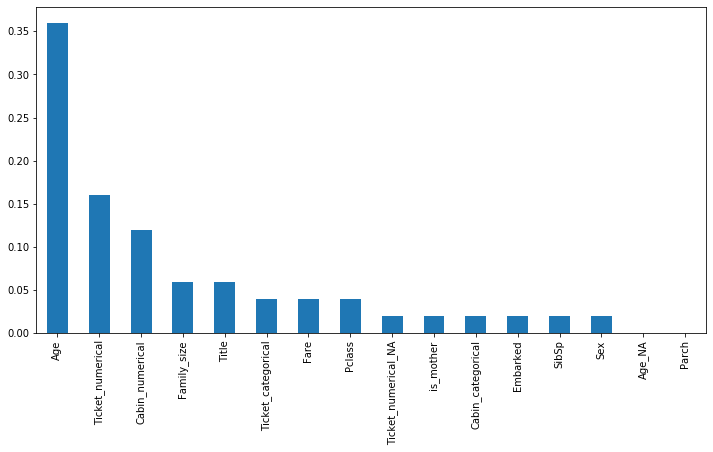

In [48]:
importance = pd.Series(model.feature_importances_)
importance.index = training_vars
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(12,6))